In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

In [2]:
import cv2

video_path = 'C:/Users/gssai/Downloads/GOAT Glimpse.mp4'
cap = cv2.VideoCapture(video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Video loaded: {fps} FPS, {frame_count} frames, {width}x{height} resolution")


Video loaded: 24 FPS, 1209 frames, 3840x1608 resolution


In [3]:
frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

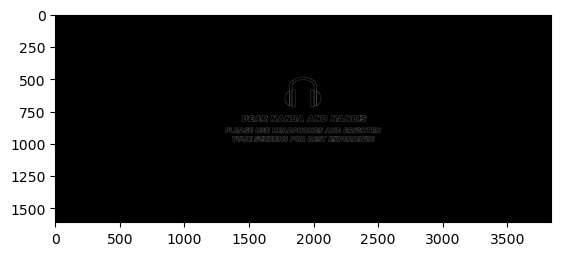

In [4]:
segmented_frames = []
for frame in frames:
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_frame, 100, 200)  # Edge detection
    segmented_frames.append(edges)

# Display a segmented frame
import matplotlib.pyplot as plt
plt.imshow(segmented_frames[0], cmap='gray')
plt.show()


In [5]:
def detect_scene_cuts(frames, threshold=0.5):
    scene_cuts = []
    prev_hist = None
    for i, frame in enumerate(frames):
        hist = cv2.calcHist([frame], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        
        if prev_hist is not None:
            diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_CORREL)
            if diff < threshold:
                scene_cuts.append(i)  # Hard cut detected
        prev_hist = hist
    
    return scene_cuts

hard_cuts = detect_scene_cuts(frames)
print(f"Hard cuts detected at frames: {hard_cuts}")


Hard cuts detected at frames: [48, 144, 212, 246, 284, 312, 332, 341, 365, 398, 399, 411, 434, 446, 447, 448, 472, 482, 490, 502, 510, 542, 564, 620, 634, 641, 647, 653, 660, 667, 684, 708, 716, 837, 1107, 1112, 1117, 1119, 1120, 1122, 1124, 1125, 1126, 1127, 1128, 1129, 1135, 1136, 1137, 1138, 1139, 1195]


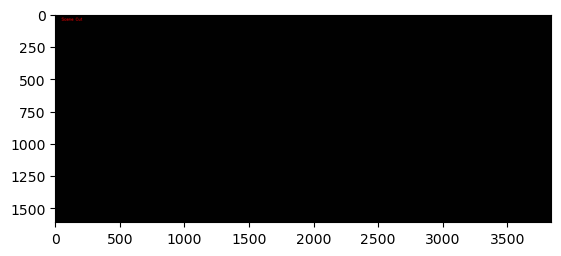

In [6]:

marked_frames = frames.copy()
for cut in hard_cuts:
    cv2.putText(marked_frames[cut], 'Scene Cut', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(marked_frames[hard_cuts[0]], cv2.COLOR_BGR2RGB))
plt.show()


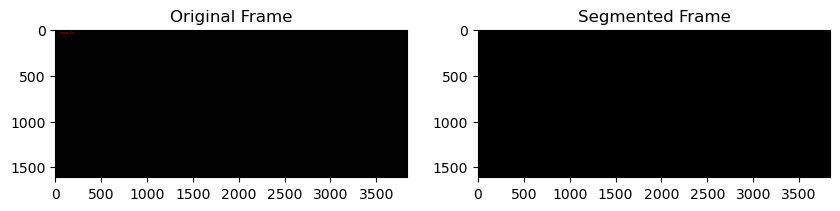

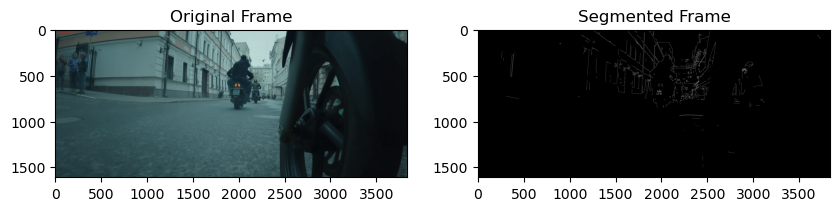

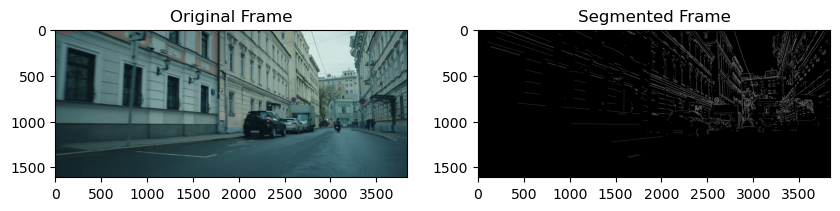

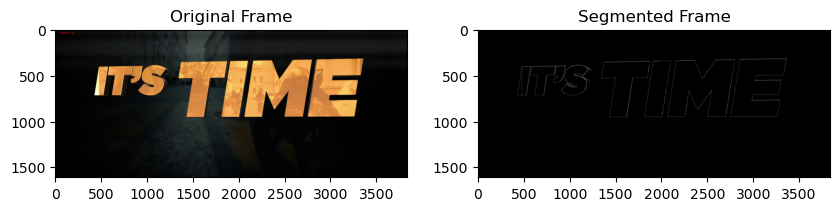

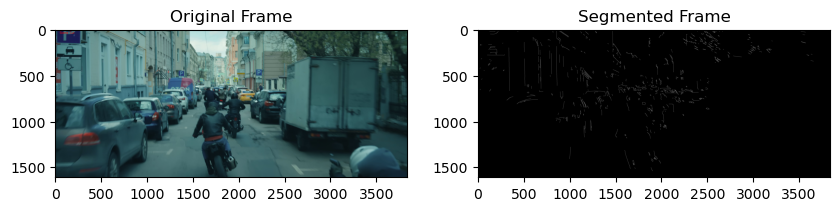

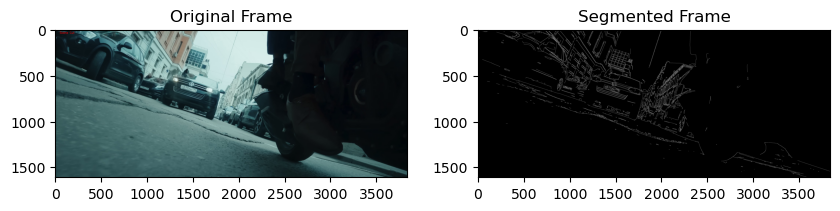

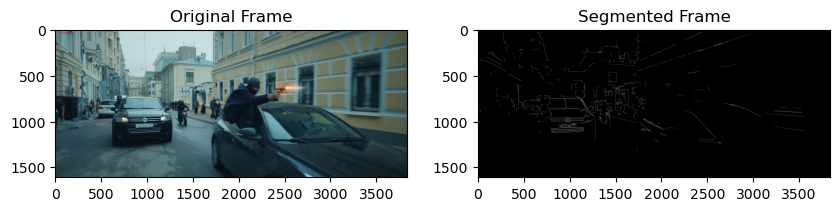

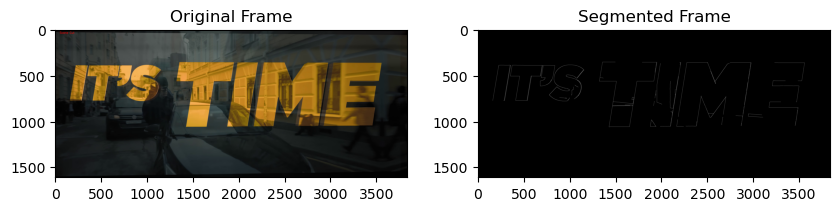

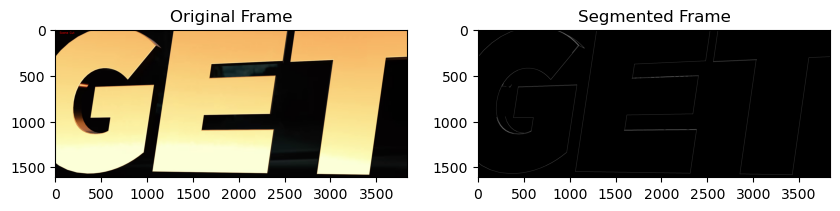

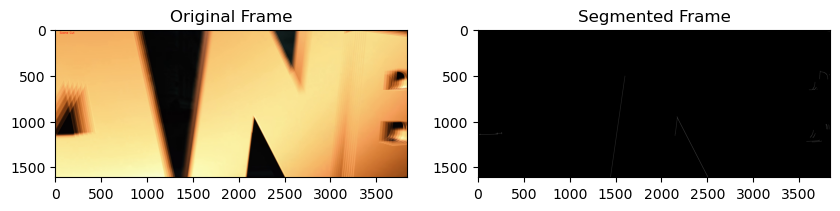

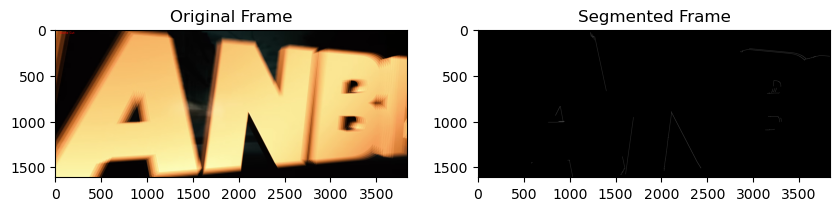

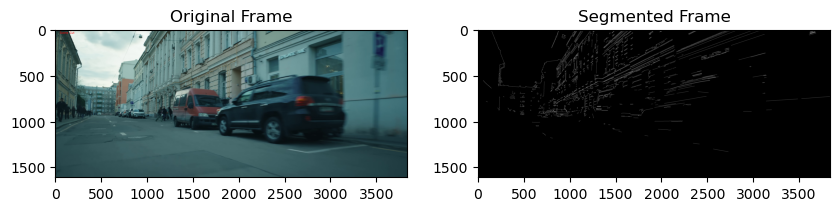

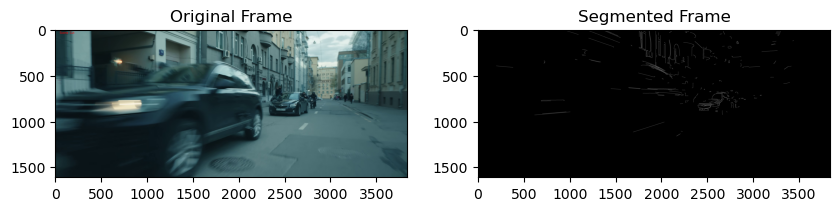

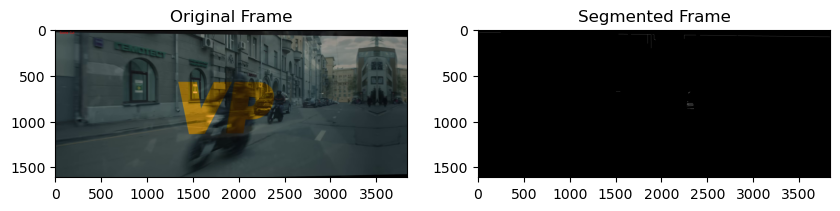

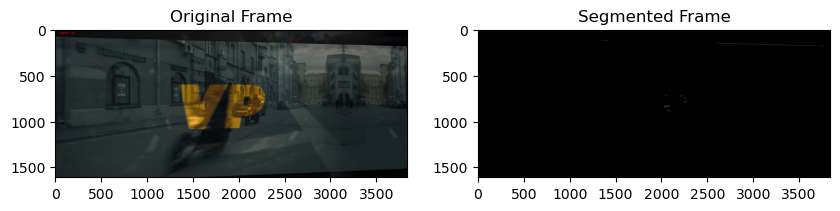

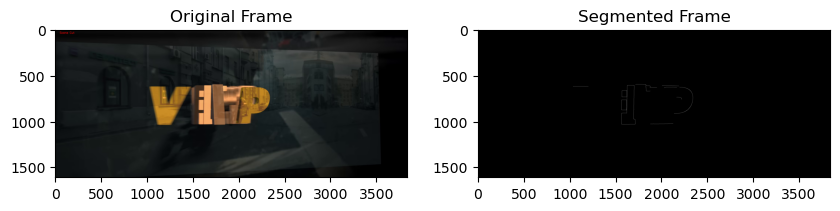

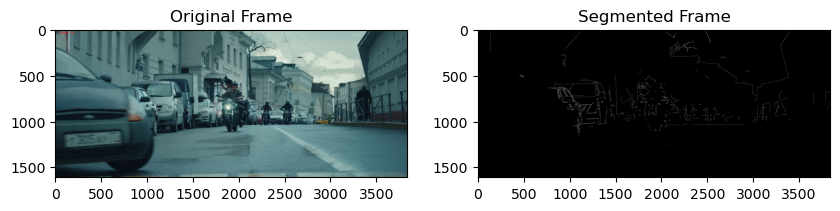

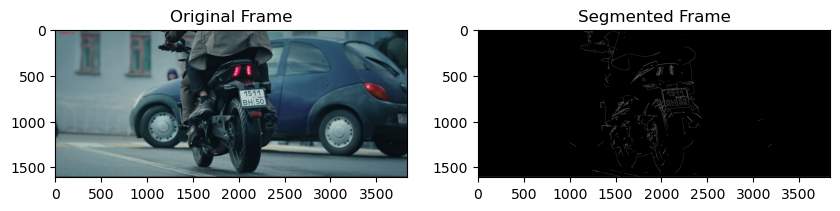

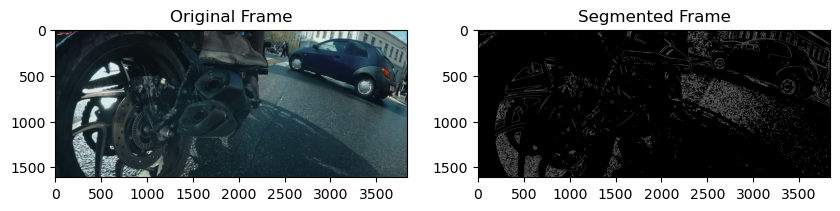

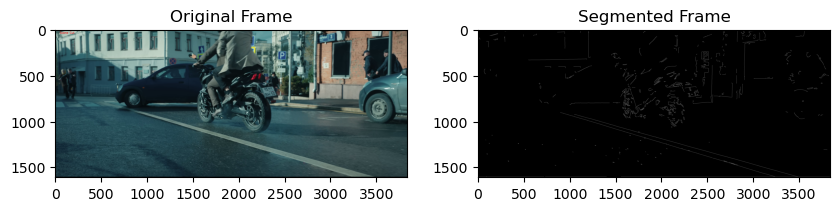

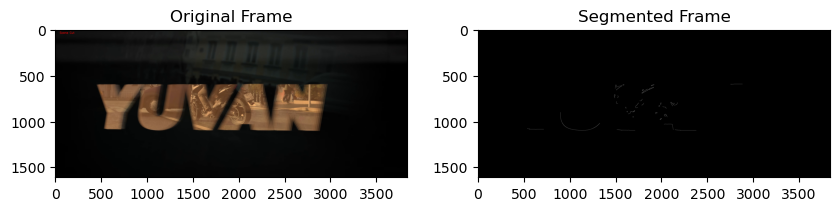

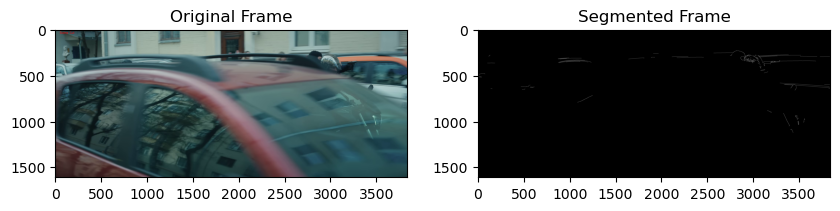

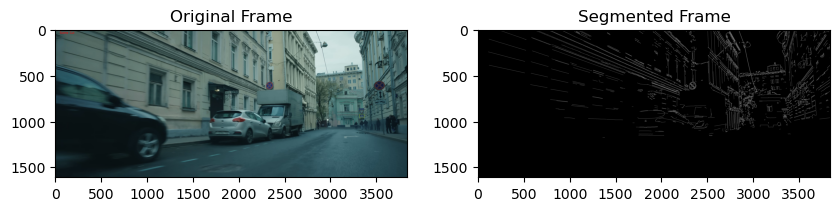

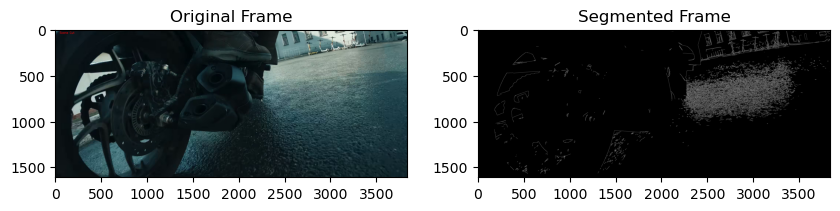

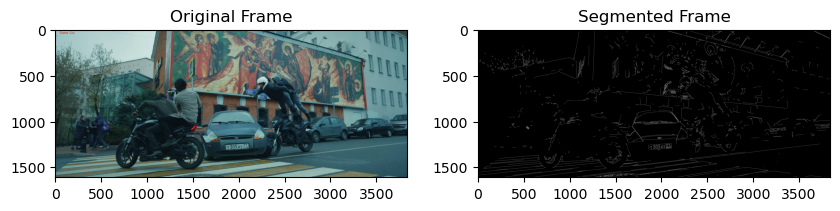

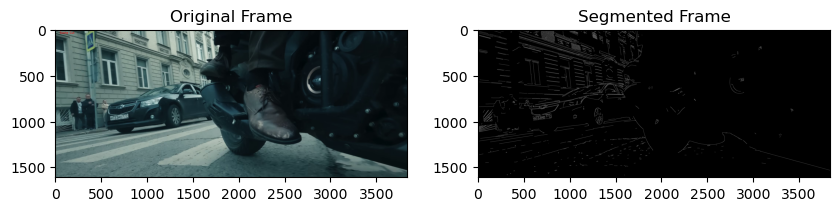

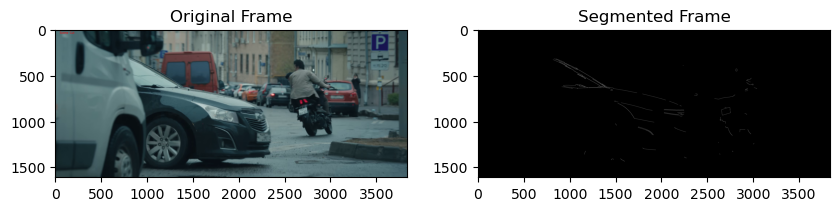

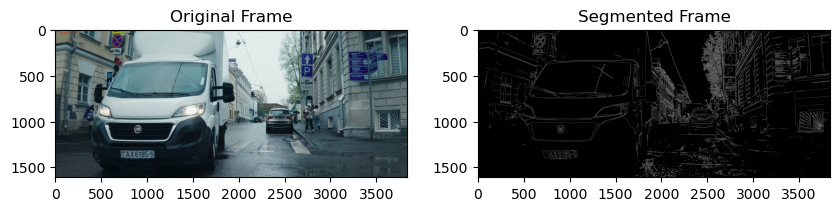

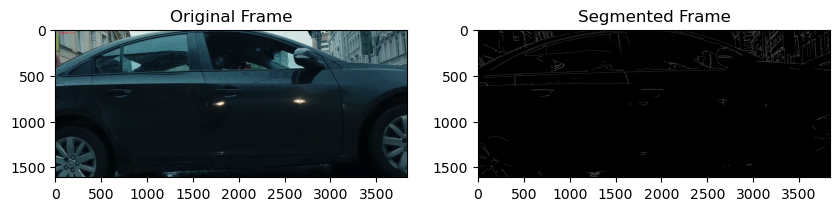

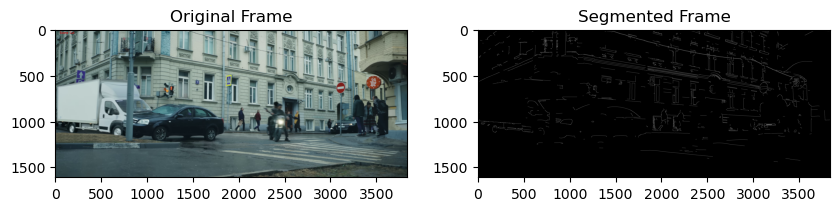

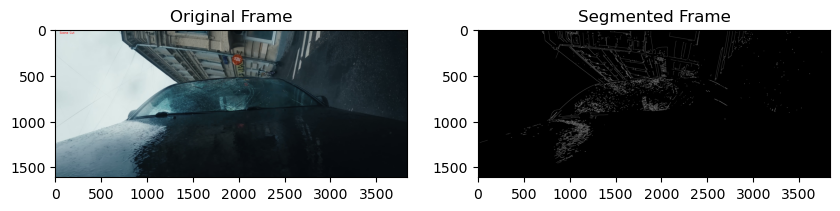

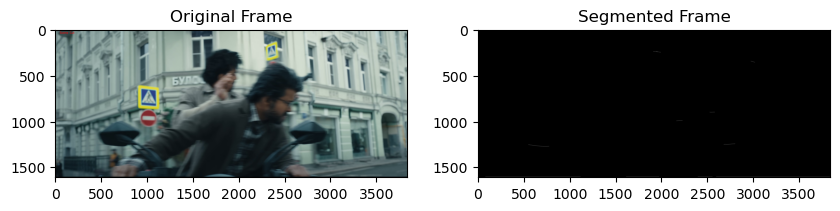

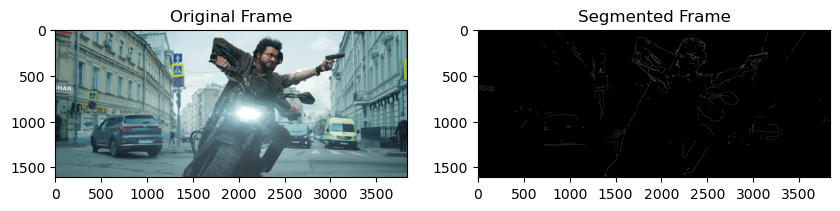

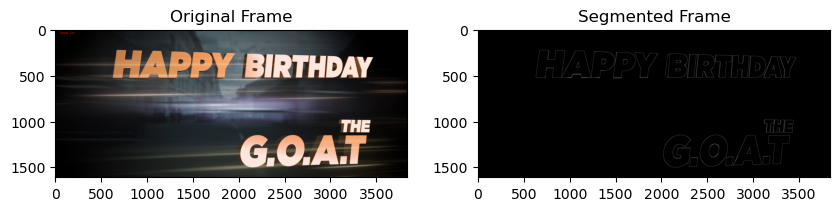

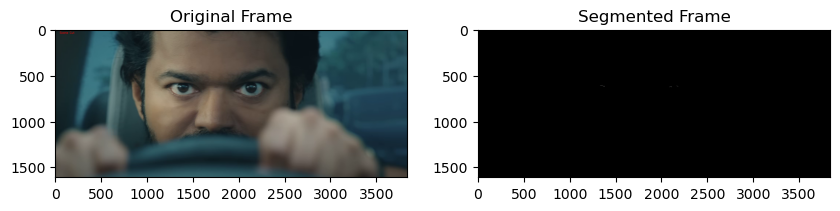

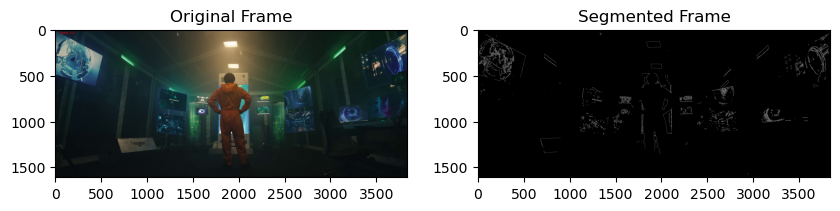

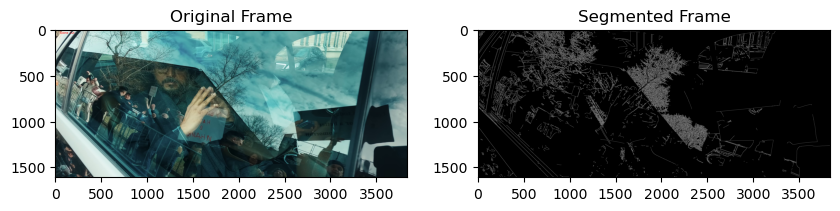

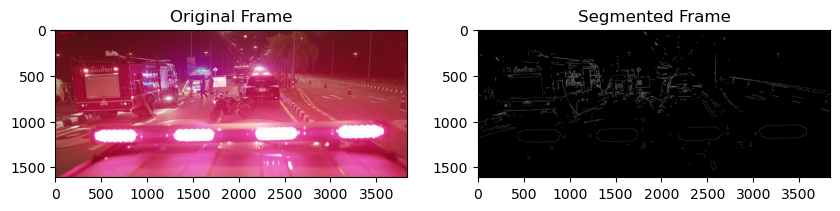

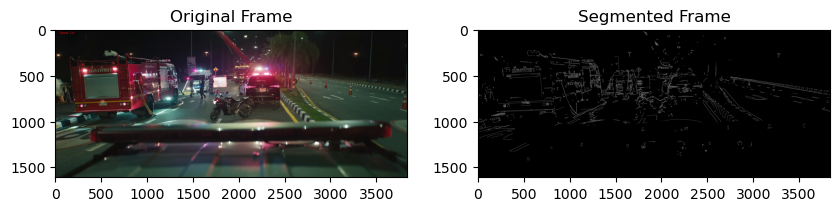

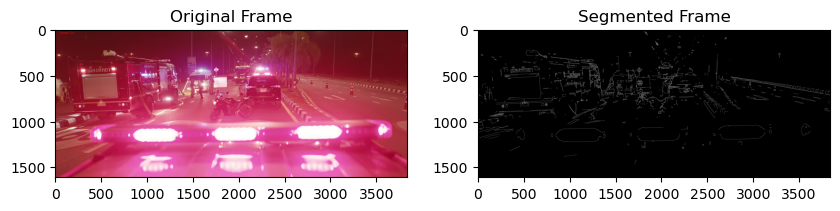

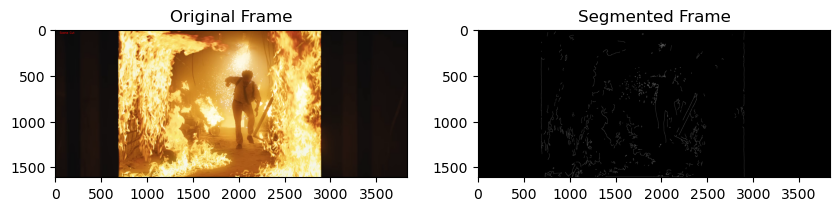

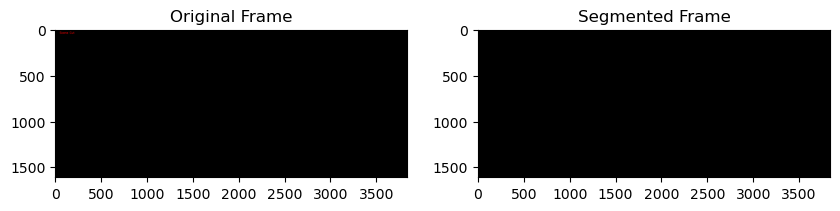

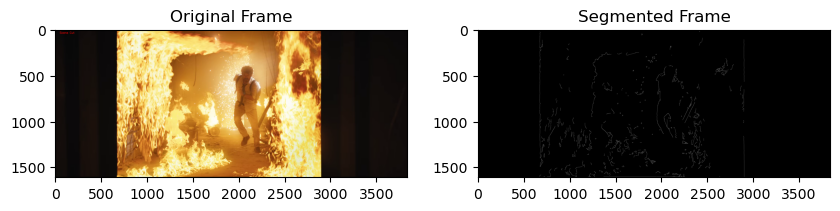

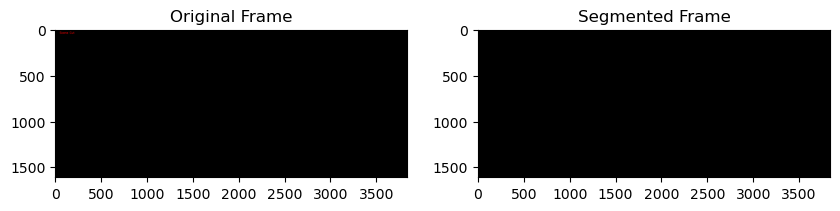

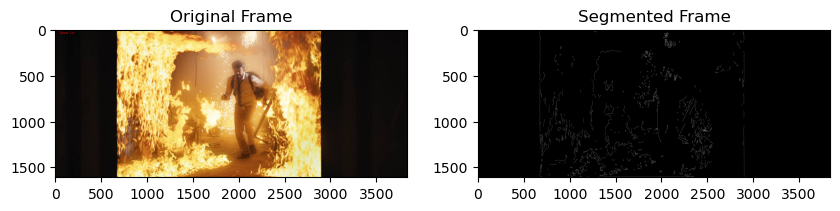

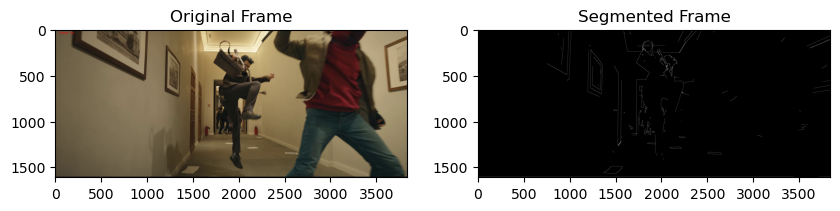

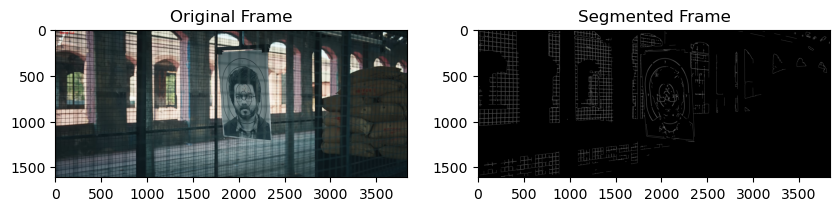

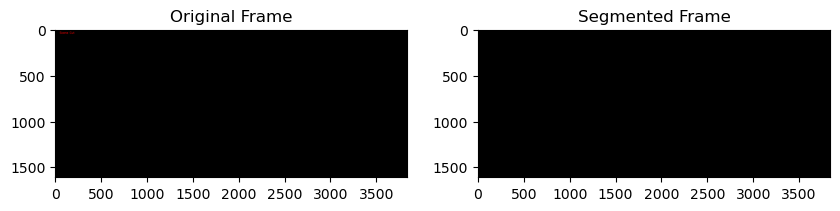

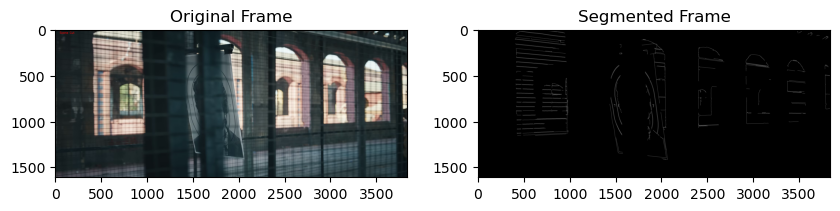

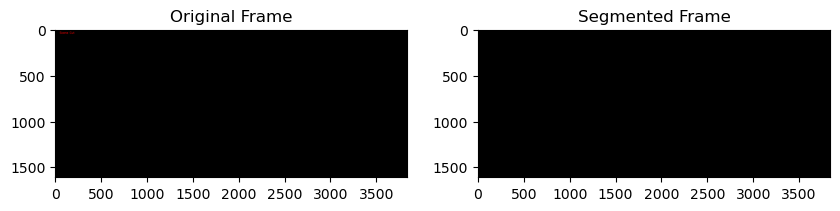

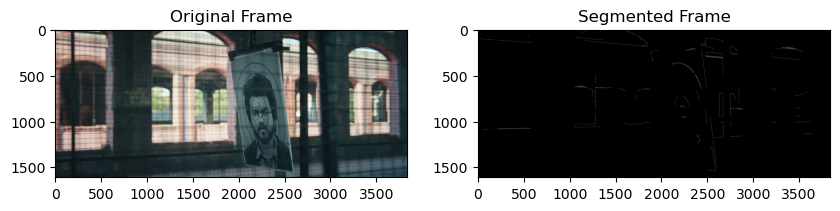

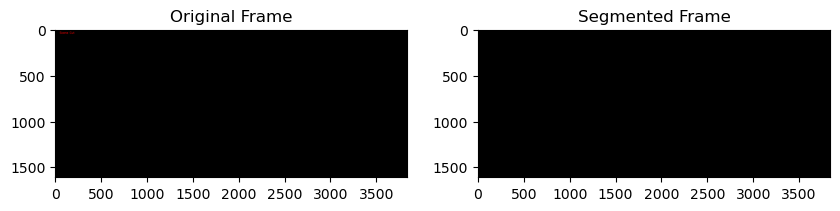

In [7]:
import matplotlib.pyplot as plt

for cut in hard_cuts:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Original frame
    axs[0].imshow(cv2.cvtColor(frames[cut], cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Frame')
    
    # Segmented frame
    axs[1].imshow(segmented_frames[cut], cmap='gray')
    axs[1].set_title('Segmented Frame')
    
    plt.show()
